<a href="https://colab.research.google.com/github/JiyaPaliwal14/Machine-Learning/blob/main/smote_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = {
    'f1' : np.random.normal(0, 1, 1000),
    'f2' : np.random.normal(0, 1, 1000),
    'target' : [0]*900 + [1]*100
}

df = pd.DataFrame(data)

print(df)

           f1        f2  target
0    0.287583 -1.549257       0
1   -1.213457  2.358298       0
2    0.030927  0.210760       0
3   -0.065867  0.075993       0
4   -0.195108 -1.281200       0
..        ...       ...     ...
995 -0.115026 -0.346311       1
996 -0.611034  0.978936       1
997  0.471554 -0.164142       1
998 -1.111135 -0.416066       1
999  1.450526 -1.125745       1

[1000 rows x 3 columns]


In [4]:
X = df[['f1', 'f2']]
y = df['target']

print("value count y = ", y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

value count y =  target
0    900
1    100
Name: count, dtype: int64


In [5]:
smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("value count y_train = ", y_train.value_counts())
print("value count y_res = ", y_res.value_counts())

value count y_train =  target
0    721
1     79
Name: count, dtype: int64
value count y_res =  target
0    721
1    721
Name: count, dtype: int64



accuracy without smote =  0.875

classificaiton report =                precision    recall  f1-score   support

           0       0.89      0.98      0.93       179
           1       0.00      0.00      0.00        21

    accuracy                           0.88       200
   macro avg       0.45      0.49      0.47       200
weighted avg       0.80      0.88      0.84       200


confusion matrix =  [[175   4]
 [ 21   0]]


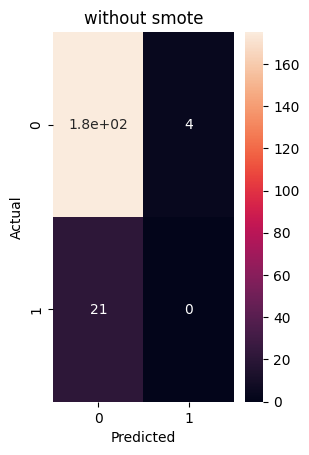

In [10]:
#random forest without smote
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\naccuracy without smote = ", accuracy_score(y_test, y_pred))
print("\nclassificaiton report = ", classification_report(y_test, y_pred))

print("\nconfusion matrix = ", confusion_matrix(y_test, y_pred))

ax1 = plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax1)
ax1.set_title("without smote")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")
plt.show()


accuracy with smote =  0.7

classificaiton report =                precision    recall  f1-score   support

           0       0.88      0.77      0.82       179
           1       0.07      0.14      0.09        21

    accuracy                           0.70       200
   macro avg       0.48      0.45      0.46       200
weighted avg       0.80      0.70      0.74       200


confusion matrix =  [[137  42]
 [ 18   3]]


Text(321.26767676767673, 0.5, 'Actual')

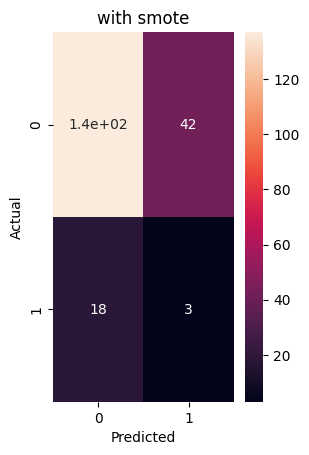

In [11]:
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_res, y_res)

y_pred_sm = rf_sm.predict(X_test)

print("\naccuracy with smote = ", accuracy_score(y_test, y_pred_sm))
print("\nclassificaiton report = ", classification_report(y_test, y_pred_sm))

print("\nconfusion matrix = ", confusion_matrix(y_test, y_pred_sm))

ax2 = plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, ax=ax2)
ax2.set_title("with smote")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")